In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file
file_path = '/content/drive/MyDrive/DATA245-Machine-Learning-Group(3)/ML_Project/email_job_scam_cleaned.csv'

# Read the CSV file
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
df = pd.read_csv(file_path)
df = df.drop(columns=['job_id'])

In [4]:
df.head()

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,is_scam,has_links_without_https,Identity_details_asked,average_days_between_interview_and_job_offer,avg_no_of_time_sensitive_details,avg_no_of_baity_phrases
0,Marketing Intern,"US, NY, New York",Marketing,Not Specified,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0,0.0,0.0,30.824035,-0.100992,0.306755
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0,0.0,0.0,26.821787,5.957187,0.488798
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Not Specified,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0,0.0,1.0,27.440842,5.285345,0.890709
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0.0,0.0,44.388317,1.017005,0.122852
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,Not Specified,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0.0,0.0,20.342851,1.174334,0.245058



Model Evaluation:
Accuracy: 0.9627143922445935

Confusion Matrix:
[[4962   37]
 [ 163  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.85      0.55      0.67       365

    accuracy                           0.96      5364
   macro avg       0.91      0.77      0.82      5364
weighted avg       0.96      0.96      0.96      5364



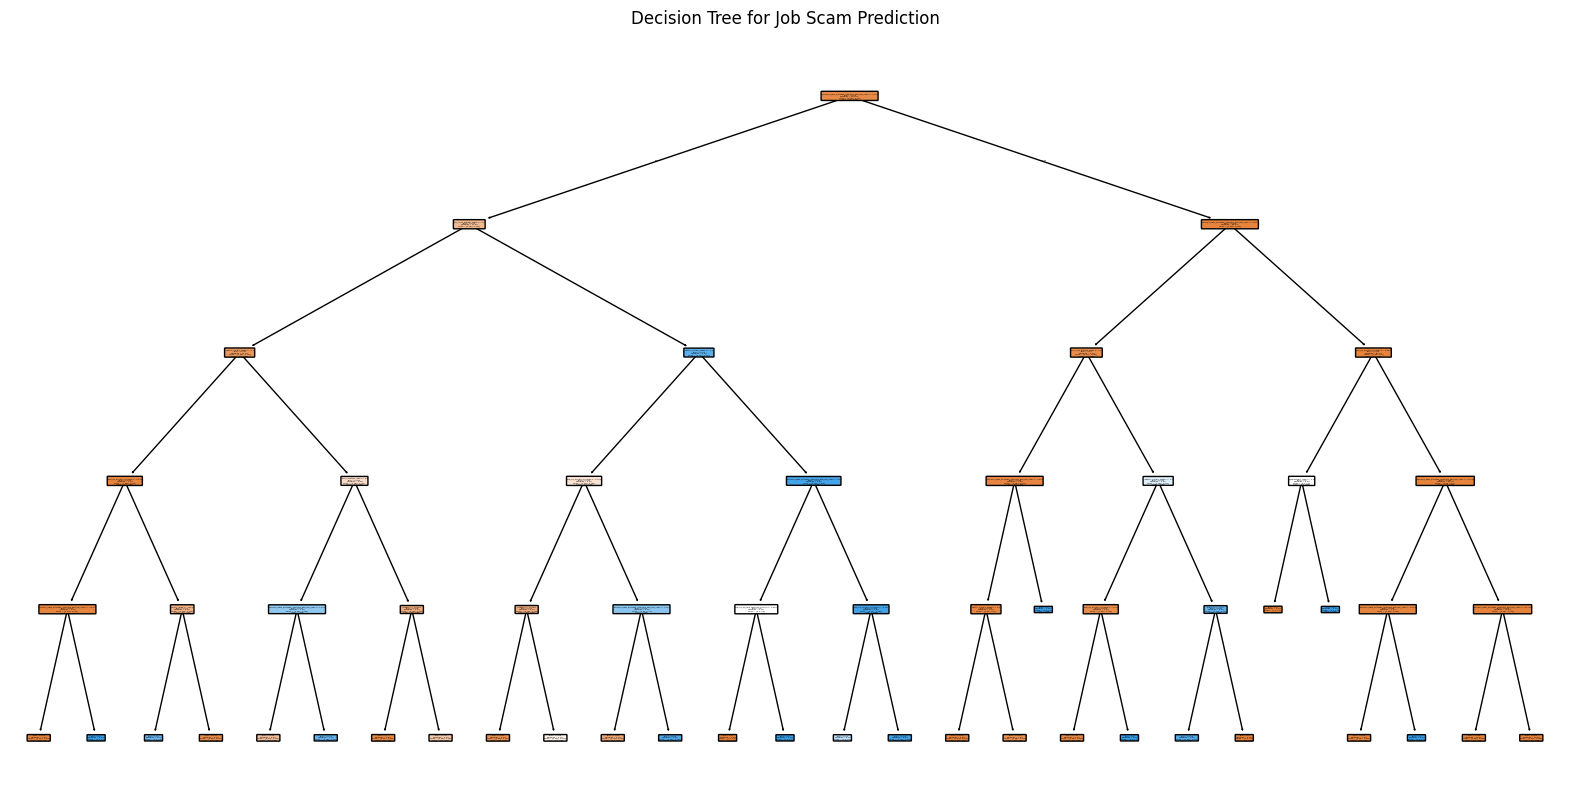


Feature Importance:
                                         Feature  Importance
12                       has_links_without_https    0.401152
14  average_days_between_interview_and_job_offer    0.338639
13                        Identity_details_asked    0.165057
5                               has_company_logo    0.047509
1                                       location    0.017956
16                       avg_no_of_baity_phrases    0.016756
3                                   salary_range    0.004568
15              avg_no_of_time_sensitive_details    0.003629
11                                      function    0.003523
7                                employment_type    0.001210
0                                          title    0.000000
2                                     department    0.000000
4                                  telecommuting    0.000000
8                            required_experience    0.000000
6                                  has_questions    0.000000
9  

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
# Preprocessing
# Handle categorical variables - we'll treat all object/string columns as categorical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        # Fill missing values with 'Unknown' before encoding
        df[col] = df[col].fillna('Unknown')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Fill remaining numerical NA values with 0 (or you could use mean/median)
df = df.fillna(0)

# Define features and target
X = df.drop('is_scam', axis=1)
y = df['is_scam']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting depth for interpretability
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree (might be large)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Scam', 'Scam'],
               filled=True, rounded=True, proportion=True)
plt.title("Decision Tree for Job Scam Prediction")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

cm_dt = confusion_matrix(y_test, y_pred)

Random Forest Model Evaluation:
Accuracy: 0.9670

Confusion Matrix:
[[4943   56]
 [ 121  244]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4999
           1       0.81      0.67      0.73       365

    accuracy                           0.97      5364
   macro avg       0.89      0.83      0.86      5364
weighted avg       0.97      0.97      0.97      5364



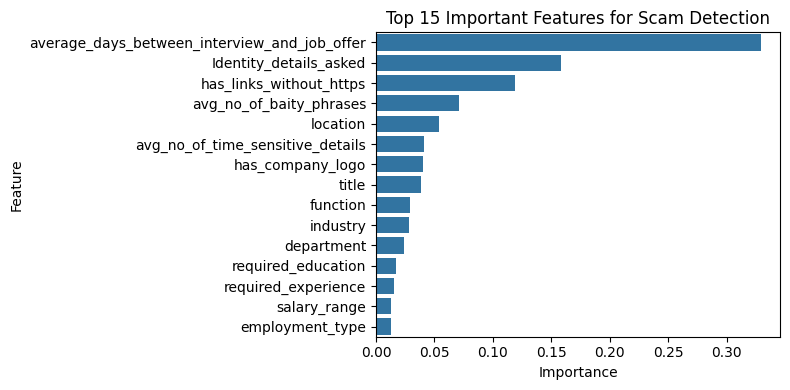

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Maximum depth of each tree
    min_samples_split=5,  # Minimum samples required to split a node
    random_state=42,
    class_weight='balanced'  # Handles class imbalance if exists
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features for Scam Detection')
plt.tight_layout()
plt.show()

cm_rf = confusion_matrix(y_test, y_pred)

In [9]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

cm_nb = confusion_matrix(y_test, y_pred)

Confusion Matrix:
 [[4743  256]
 [ 135  230]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4999
           1       0.47      0.63      0.54       365

    accuracy                           0.93      5364
   macro avg       0.72      0.79      0.75      5364
weighted avg       0.94      0.93      0.93      5364


Accuracy Score: 0.9271066368381805


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_lr = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.87      0.51      0.64       365

    accuracy                           0.96      5364
   macro avg       0.92      0.75      0.81      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9614093959731543
Confusion Matrix:
 [[4971   28]
 [ 179  186]]


In [11]:

from sklearn.svm import SVC

svm_rbf_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf_model.fit(X_train_scaled, y_train)

y_pred = svm_rbf_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_rbf = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4999
           1       0.89      0.54      0.67       365

    accuracy                           0.96      5364
   macro avg       0.93      0.77      0.83      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9640193885160329
Confusion Matrix:
 [[4975   24]
 [ 169  196]]


In [12]:
svm_linear_model = SVC(kernel='linear', probability=True, random_state=42)
svm_linear_model.fit(X_train_scaled, y_train)

y_pred = svm_linear_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_linear = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4999
           1       0.86      0.50      0.63       365

    accuracy                           0.96      5364
   macro avg       0.91      0.75      0.80      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9602908277404921
Confusion Matrix:
 [[4969   30]
 [ 183  182]]


In [13]:
svm_poly_model = SVC(kernel='poly', probability=True, random_state=42)
svm_poly_model.fit(X_train_scaled, y_train)

y_pred = svm_poly_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_poly = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.88      0.54      0.67       365

    accuracy                           0.96      5364
   macro avg       0.92      0.77      0.82      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9632736763609246
Confusion Matrix:
 [[4971   28]
 [ 169  196]]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # k is tunable
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_knn = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.82      0.56      0.66       365

    accuracy                           0.96      5364
   macro avg       0.89      0.77      0.82      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9614093959731543
Confusion Matrix:
 [[4953   46]
 [ 161  204]]


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 1. Prepare data
texts = df['title'].astype(str)
y = df['is_scam']

# 2. Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=100)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

# 4. LSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

# 5. Evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy and classification report
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))




Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9157 - loss: 0.3002 - val_accuracy: 0.9273 - val_loss: 0.2566
Epoch 2/3
202/202 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9361 - loss: 0.2329 - val_accuracy: 0.9273 - val_loss: 0.2444
Epoch 3/3
202/202 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9359 - loss: 0.1883 - val_accuracy: 0.9287 - val_loss: 0.2492
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step

Accuracy: 0.9388
Precision: 0.7547
Recall: 0.1626
F1 Score: 0.2676

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3330
           1       0.75      0.16      0.27       246

    accuracy                           0.94      3576
   macro avg       0.85      0.58      0.62      3576
weighted avg       0.93      0.94      0.92      3576



In [16]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix
)
import numpy as np
import pandas as pd

# Function to calculate all metrics from a confusion matrix
def evaluate_from_confusion_matrix(cm, average='binary'):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    y_true = np.array([1]*TP + [0]*TN + [0]*FP + [1]*FN)
    y_pred = np.array([1]*TP + [0]*TN + [1]*FP + [0]*FN)

    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average=average, zero_division=0),
        'F0.5 Score': fbeta_score(y_true, y_pred, beta=0.5, average=average, zero_division=0),
        'F2 Score': fbeta_score(y_true, y_pred, beta=2.0, average=average, zero_division=0),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred)
    }

# Assuming y_test and y_pred (from LSTM) are already available
cm_lstm = confusion_matrix(y_test, y_pred)

# All confusion matrices
conf_matrices = {
    "Decision Tree": cm_dt,
    "Random Forest": cm_rf,
    "Naive Bayes": cm_nb,
    "Logistic Regression": cm_lr,
    "SVM RBF": cm_svm_rbf,
    "SVM Linear": cm_svm_linear,
    "SVM Poly": cm_svm_poly,
    "KNN": cm_knn,
    "LSTM": cm_lstm
}

# Evaluate and compile into DataFrame
results = {model: evaluate_from_confusion_matrix(cm) for model, cm in conf_matrices.items()}
results_df = pd.DataFrame(results).T.round(4)

print(results_df)



                     Accuracy  Precision  Recall  F1 Score  F0.5 Score  \
Decision Tree          0.9627     0.8452  0.5534    0.6689      0.7646   
Random Forest          0.9670     0.8133  0.6685    0.7338      0.7796   
Naive Bayes            0.9271     0.4733  0.6301    0.5405      0.4981   
Logistic Regression    0.9614     0.8692  0.5096    0.6425      0.7617   
SVM RBF                0.9640     0.8909  0.5370    0.6701      0.7871   
SVM Linear             0.9603     0.8585  0.4986    0.6308      0.7502   
SVM Poly               0.9633     0.8750  0.5370    0.6655      0.7772   
KNN                    0.9614     0.8160  0.5589    0.6634      0.7473   
LSTM                   0.9388     0.7547  0.1626    0.2676      0.4367   

                     F2 Score     MCC   Kappa  
Decision Tree          0.5945  0.6664  0.6500  
Random Forest          0.6932  0.7203  0.7164  
Naive Bayes            0.5910  0.5079  0.5018  
Logistic Regression    0.5556  0.6485  0.6236  
SVM RBF            

In [26]:
from sklearn.metrics import roc_curve, auc

# Store the models
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb,
    'Logistic Regression': logreg,
    'SVM RBF': svm_rbf_model,
    'SVM Linear': svm_linear_model,
    'SVM Poly': svm_poly_model,
    'KNN': knn_model
}

# Plot settings
plt.figure(figsize=(7, 6))

for model_name, model in models.items():
    # Use scaled or unscaled test data depending on the model
    if model_name in ['Logistic Regression', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'KNN']:
        X_input = X_test_scaled
    else:
        X_input = X_test

    # Get probability or decision function
    try:
        if hasattr(model, "predict_proba"):
            probas_ = model.predict_proba(X_input)[:, 1]
        elif hasattr(model, "decision_function"):
            # Normalize decision_function output to [0, 1] for ROC
            decision_scores = model.decision_function(X_input)
            probas_ = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            continue  # Skip models that can't produce a score
    except Exception as e:
        print(f"Error for {model_name}: {e}")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Final plot touches
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Error for Decision Tree: X has 100 features, but DecisionTreeClassifier is expecting 17 features as input.
Error for Random Forest: X has 100 features, but RandomForestClassifier is expecting 17 features as input.
Error for Naive Bayes: X has 100 features, but GaussianNB is expecting 17 features as input.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [3576, 5364]

<Figure size 700x600 with 0 Axes>

In [ ]:


from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}
# For RBF
param_grid_svm_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                       cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Best Params:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score: 0.7396507600038387


In [27]:
from sklearn.metrics import roc_curve, auc

# Store the models
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Tuned Random Forest': grid_rf,
    'Naive Bayes': nb,
    'Logistic Regression': logreg,
    'SVM RBF': svm_rbf_model,
    'SVM Linear': svm_linear_model,
    'SVM Poly': svm_poly_model,
    'KNN': knn_model
}

# Plot settings
plt.figure(figsize=(7, 6))

for model_name, model in models.items():
    # Use scaled or unscaled test data depending on the model
    if model_name in ['Logistic Regression', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'KNN']:
        X_input = X_test_scaled
    else:
        X_input = X_test

    # Get probability or decision function
    try:
        if hasattr(model, "predict_proba"):
            probas_ = model.predict_proba(X_input)[:, 1]
        elif hasattr(model, "decision_function"):
            # Normalize decision_function output to [0, 1] for ROC
            decision_scores = model.decision_function(X_input)
            probas_ = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            continue  # Skip models that can't produce a score
    except Exception as e:
        print(f"Error for {model_name}: {e}")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Final plot touches
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


NameError: name 'grid_rf' is not defined

In [ ]:
import pandas as pd

# Manually framed example with different values from the previous row
new_row_data = {
    'title': 7050,
    'location': 1642,
    'department': 812,
    'salary_range': 950,
    'telecommuting': 1,
    'has_company_logo': 0,
    'has_questions': 1,
    'employment_type': 1,
    'required_experience': 3,
    'required_education': 4,
    'industry': 120,
    'function': 30,
    'has_links_without_https': 0.0,
    'Identity_details_asked': 0.0,
    'average_days_between_interview_and_job_offer': 40.2,
    'avg_no_of_time_sensitive_details': 0.351,
    'avg_no_of_baity_phrases': 0.587
}

# Create DataFrame
new_test_df = pd.DataFrame([new_row_data])


In [ ]:
# Select one row including the label
row_index = 0  # Change index as needed

print(new_test_df)
# Apply scaling if your model was trained with scaled features
test_row_scaled = scaler.transform(new_test_df)

# Predict with the model
predicted_class = rf_model.predict(new_test_df)[0]
predicted_proba = rf_model.predict_proba(new_test_df)[0]

# Show results
print(f"✅ Predicted class: {predicted_class}")
print(f"📊 Predicted probabilities: Not Fraudulent = {predicted_proba[0]:.4f}, Fraudulent = {predicted_proba[1]:.4f}")


   title  location  department  salary_range  telecommuting  has_company_logo  \
0   7050      1642         812           950              1                 0   

   has_questions  employment_type  required_experience  required_education  \
0              1                1                    3                   4   

   industry  function  has_links_without_https  Identity_details_asked  \
0       120        30                      0.0                     0.0   

   average_days_between_interview_and_job_offer  \
0                                          40.2   

   avg_no_of_time_sensitive_details  avg_no_of_baity_phrases  
0                             0.351                    0.587  
✅ Predicted class: 0
📊 Predicted probabilities: Not Fraudulent = 0.8715, Fraudulent = 0.1285


In [ ]:
df.head()

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,is_scam,has_links_without_https,Identity_details_asked,average_days_between_interview_and_job_offer,avg_no_of_time_sensitive_details,avg_no_of_baity_phrases
0,6043,2535,758,872,0,1,0,3,4,6,88,22,0,0.0,0.0,30.824035,-0.100992,0.306755
1,2183,1073,1161,872,0,1,0,1,6,6,75,7,0,0.0,0.0,26.821787,5.957187,0.488798
2,1763,1867,1241,872,0,1,0,2,7,6,88,23,0,0.0,1.0,27.440842,5.285345,0.890709
3,299,1703,1054,872,0,1,0,1,5,1,22,32,0,0.0,0.0,44.388317,1.017005,0.122852
4,975,1741,1241,872,0,1,1,1,5,1,51,16,0,0.0,0.0,20.342851,1.174334,0.245058
